In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
numerical_columns = ['Year','Selling_Price','Present_Price','Driven_kms']
numerical_df = df[numerical_columns]

correlation_matrix = numerical_df.corr()
correlation_matrix

,Year,Selling_Price,Present_Price,Driven_kms
Year,1.000000,0.236141,-0.047192,-0.524342
Selling_Price,0.236141,1.000000,0.878914,0.029187
Present_Price,-0.047192,0.878914,1.000000,0.203618
Driven_kms,-0.524342,0.029187,0.203618,1.000000


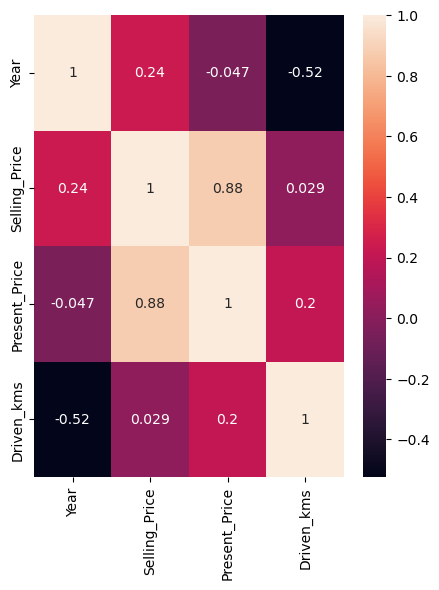

In [8]:
#Create HeatMap
plt.figure(figsize=(5,6))
sns.heatmap(correlation_matrix,annot=True)
plt.show()

<Figure size 200x200 with 0 Axes>

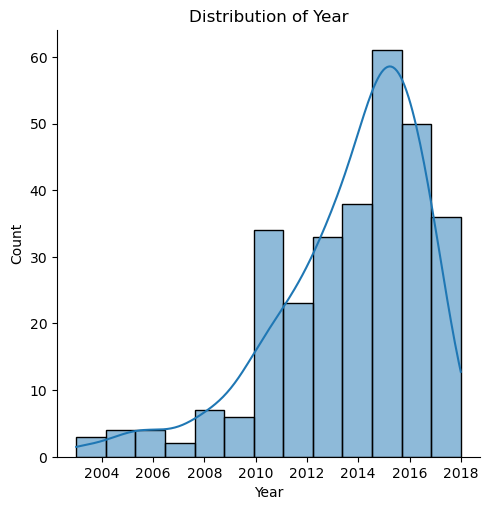

<Figure size 200x200 with 0 Axes>

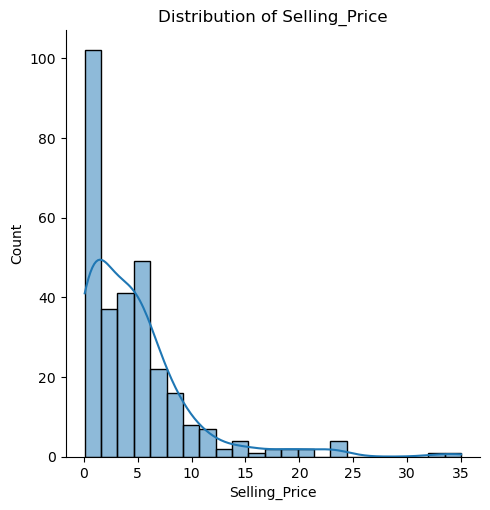

<Figure size 200x200 with 0 Axes>

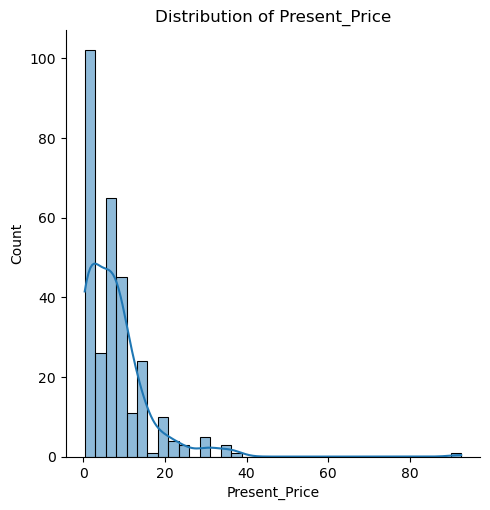

<Figure size 200x200 with 0 Axes>

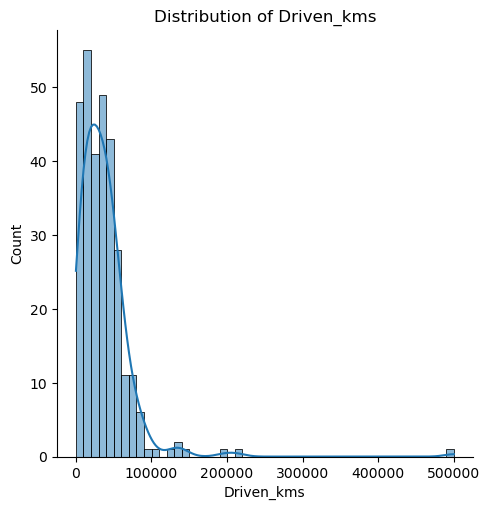

In [9]:
numerical_feature = ['Year','Selling_Price','Present_Price','Driven_kms']
for feature in numerical_feature:
    plt.figure(figsize=(2,2))
    sns.displot(data=df,x=feature,kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


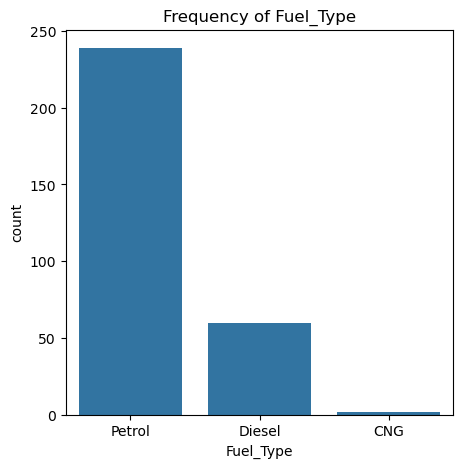

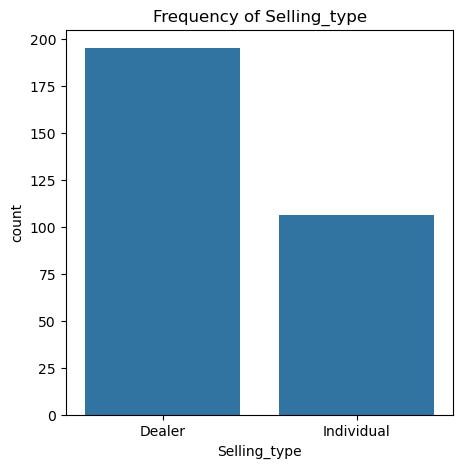

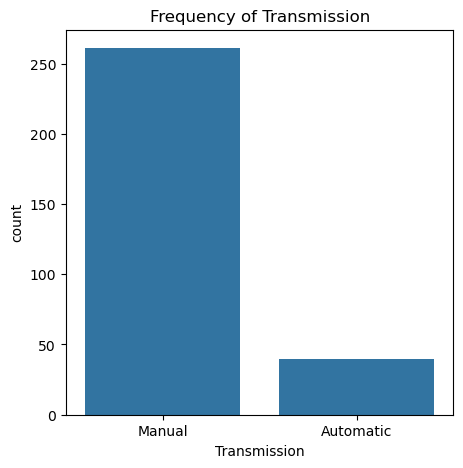

In [11]:
# Categorical features
categorical_features = ['Fuel_Type','Selling_type','Transmission']
for feature in categorical_features:
    plt.figure(figsize=(5,5))
    sns.countplot(x=feature,data=df)
    plt.title(f'Frequency of {feature}')
    plt.show()

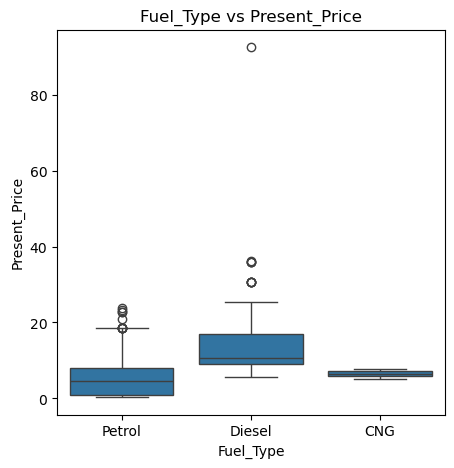

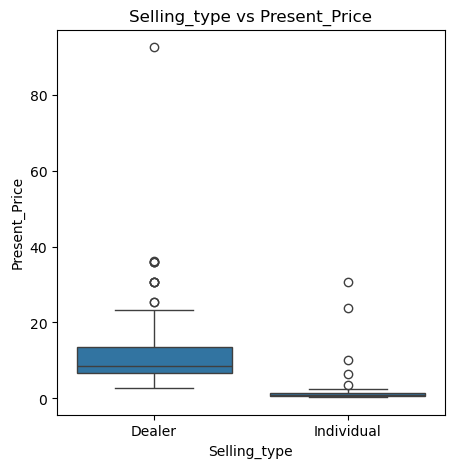

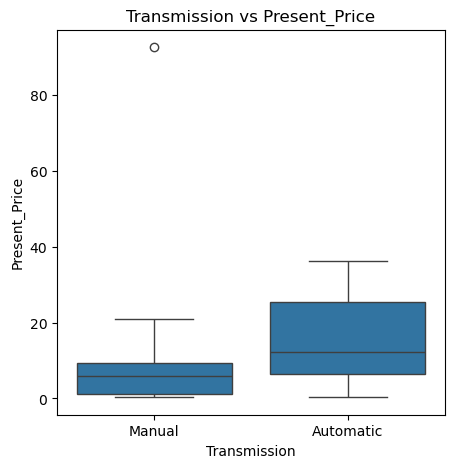

In [12]:
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']

for feature in categorical_features:
    plt.figure(figsize=(5,5))
    sns.boxplot(x=feature, y='Present_Price', data=df)
    plt.title(f'{feature} vs Present_Price')
    plt.xlabel(f'{feature}')
    plt.ylabel('Present_Price')
    plt.show()

C:\Users\mahar\AppData\Local\Temp\ipykernel_10164\1068436392.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_car_models.values, y=best_car_models.index, palette='viridis')


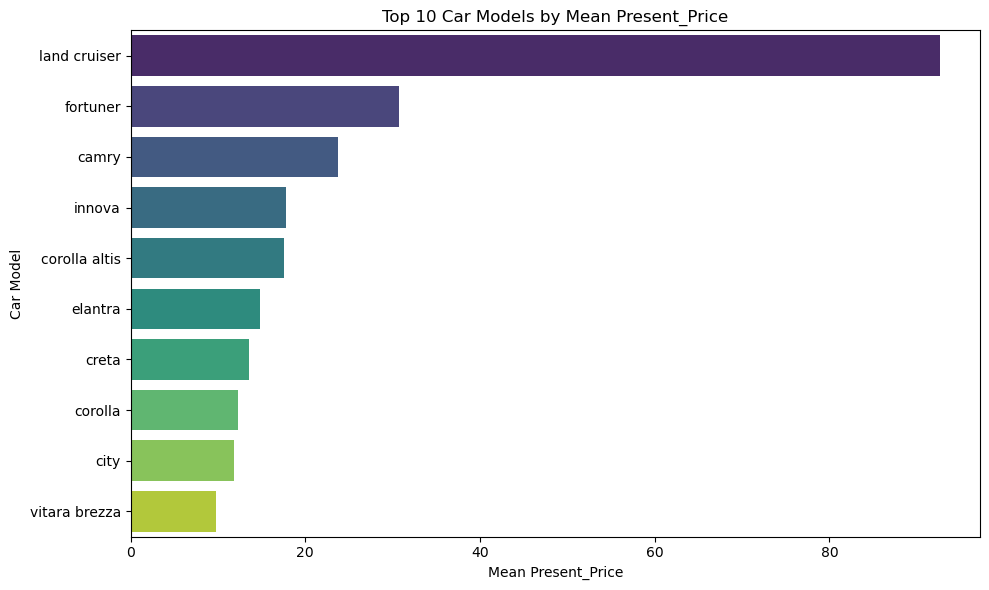

In [13]:
best_car_models = df.groupby('Car_Name')['Present_Price'].mean().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=best_car_models.values, y=best_car_models.index, palette='viridis')
plt.title(f'Top {10} Car Models by Mean Present_Price')
plt.xlabel('Mean Present_Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

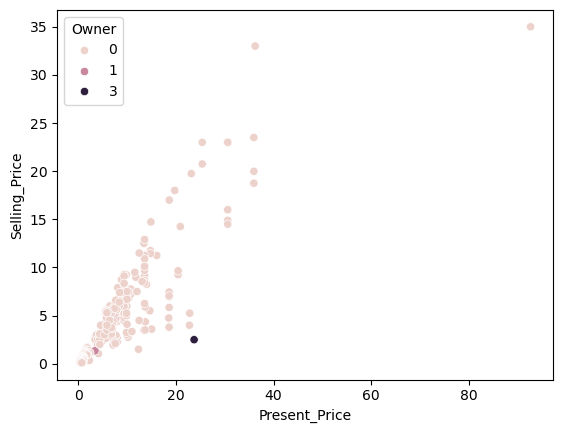

In [14]:
sns.scatterplot(data=df,x=df['Present_Price'],y=df['Selling_Price'],hue=df['Owner'])

In [15]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
# encoding "Seller_Type" Column
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

C:\Users\mahar\AppData\Local\Temp\ipykernel_10164\626136561.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
C:\Users\mahar\AppData\Local\Temp\ipykernel_10164\626136561.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
C:\Users\mahar\AppData\Local\Temp\ipykernel_10164\626136561.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. T

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Selling_type   301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [17]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [18]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 3.53157988897141
R-squared: 0.8466902419662623


In [23]:
new_car = [[2024, 20000, 0, 1, 1, 0, 0]]  
predicted_price = model.predict(new_car)
print('Predicted Selling Price:', predicted_price[0])

Predicted Selling Price: 8802.85730547064


c:\Users\mahar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Using Random Forest Model

In [24]:
def evaluation(y, predictions):
    return {
        'MAE': mean_absolute_error(y, predictions),
        'MSE': mean_squared_error(y, predictions),
        'RMSE': np.sqrt(mean_squared_error(y, predictions)),
        'R-squared': r2_score(y, predictions)
    }

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

model_name = "RandomForest"

# Build a Random Forest model
rand_for = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model on the training data
rand_for.fit(X_train, y_train)

# Predict using the model on the test data
predictions = rand_for.predict(X_test)

In [28]:
# Function call to Evaluate results of 'MAE', 'MSE', 'RMSE', 'R-squared'
evaluation_results_r = evaluation(y_test, predictions)
evaluation_results_r["Model"] = model_name
models = pd.DataFrame([evaluation_results_r])
print("Evaluation Results for", model_name)
print('-'*30)
for metric, value in evaluation_results_r.items():
    print(f"{metric}: {value}")

Evaluation Results for RandomForest
------------------------------
MAE: 0.6043131147540985
MSE: 0.8263019513114754
RMSE: 0.9090115243006963
R-squared: 0.9641293256273289
Model: RandomForest
